In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [ ]:
x = np.array([[1], [2], [3]])
y = np.array([[1.4], [5], [6]])


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pre_x = [[1], [3]]
pre_y = linreg.predict(pre_x)

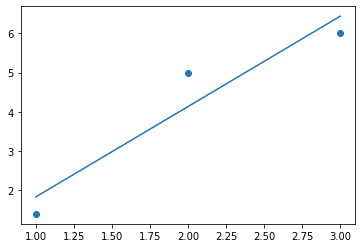

In [ ]:
plt.scatter(x, y)
plt.plot(pre_x, pre_y)

In [37]:
def trans(degree):
  return (degree + 273) / 1000

In [38]:
x = [[1 / trans(25)], [1 / trans(50)], [1 / trans(70)], [1 / trans(80)]]

D_1 = [[4.11], [4.92], [6.10], [6.66]]
D_2 = [[4.27], [4.92], [6.14], [6.62]]
print(x)

[[3.3557046979865772], [3.095975232198142], [2.9154518950437316], [2.8328611898017]]


In [ ]:
y_1 = np.log(D_1)
y_2 = np.log(D_2)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_1 = LinearRegression()
linreg_2 = LinearRegression()
linreg_3 = LinearRegression()
linreg_1.fit(x, y_1)
linreg_2.fit(x, y_2)
linreg_3.fit(np.vstack((x, x)), np.vstack((y_1, y_2)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pre_x = [[2.8], [3.4]]
pre_y_1 = linreg_1.predict(pre_x)
pre_y_2 = linreg_2.predict(pre_x)
pre_y_3 = linreg_3.predict(pre_x)
print(pre_y_1)
print(pre_y_2)

[[1.91044564]
 [1.35205609]]
[[1.9013058 ]
 [1.38807378]]


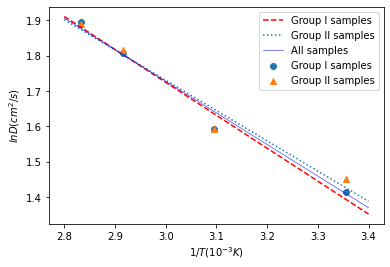

In [ ]:
plt.figure()
plt.xlabel(r"$1/T(10^{-3}K)$")
plt.ylabel(r"$lnD(cm^2/s)$")
plt.xticks(np.arange(2.8, 3.4, 0.1))
plt.yticks(np.arange(1.4, 2, 0.1))
plt.plot(pre_x,pre_y_1,label='Group I samples', linestyle='--',color='r')
plt.plot(pre_x,pre_y_2,label='Group II samples', linestyle=':')

plt.scatter(x,y_1,label='Group I samples')
plt.scatter(x,y_2,label='Group II samples', marker ='^')
plt.plot(pre_x,pre_y_3,label='All samples', linestyle='-', linewidth=0.5, color='b')
plt.legend()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt


In [3]:
sheet = pd.read_excel('example1.xlsx')
sheet

,x,y
0,25,4.11
1,50,4.92
2,70,6.10
3,80,6.66


In [ ]:
x = sheet['x']
x

0    25
1    50
2    70
3    80
Name: x, dtype: int64

In [ ]:
y = sheet['y']
y

0    4.11
1    4.92
2    6.10
3    6.66
Name: y, dtype: float64

In [10]:
X=sheet.iloc[:,:-1]
X

,x
0,25
1,50
2,70
3,80


In [11]:
Y=sheet.iloc[:,1:]
Y

,y
0,4.11
1,4.92
2,6.10
3,6.66


In [12]:
Y=np.log(Y)
X=1/(X+273.15)

In [13]:
Y

,y
0,1.413423
1,1.593309
2,1.808289
3,1.896119


In [41]:
X

,x
0,3.354016
1,3.094538
2,2.914177
3,2.831658


In [40]:
X = X*1000

In [9]:
Y

,y
0,0.003607
1,0.003596
2,0.003581
3,0.003574


In [ ]:
x = [[25], [50], [70], [80]]
y = [[4.11], [4.92], [6.10], [6.66]]

In [ ]:
x=1/(x+273.15)
y = np.log(y)

TypeError: ignored

In [15]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X, Y)
# lasso2 = Lasso(alpha=1)
# lasso2.fit(X, y)
# lasso3 = Lasso(alpha=10)
# lasso3.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

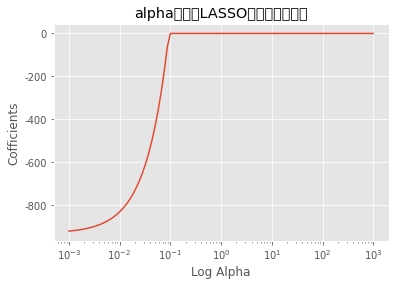

In [18]:
# 通过不确定的alphas值，生成不同的LASSO回归模型
alphas = 10**np.linspace(-3,3,100)
lasso_cofficients = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha, normalize=True, max_iter=10000)
    lasso.fit(X, Y)
    lasso_cofficients.append(lasso.coef_)

# 绘制alpha的对数与回归系数的关系# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 设置绘图风格
plt.style.use('ggplot')
plt.plot(alphas, lasso_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('alpha系数与LASSO回归系数的关系')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()

In [60]:
lasso1 = Lasso(alpha=10)
lasso1.fit(X, Y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [61]:
print(X)
pre_y = lasso1.predict(X)
pre_y

          x
0  3.354016
1  3.094538
2  2.914177
3  2.831658


array([1.67778495, 1.67778495, 1.67778495, 1.67778495])

In [16]:

lasso1.score()

TypeError: ignored

In [ ]:
pre_x = [[2], [5]]
pre_y_1 = lasso1.predict(pre_x)
pre_y_2 = lasso2.predict(pre_x)
pre_y_3 = lasso3.predict(pre_x)
print(pre_y_1)
print(pre_y_3)
print(pre_x)

[1.67778495 1.67778495]
[1.67778495 1.67778495]
[[2], [5]]


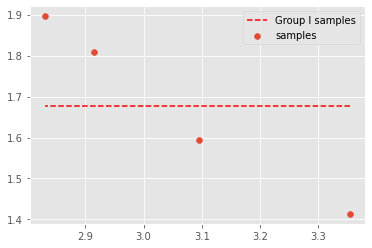

In [62]:
plt.figure()

# plt.xticks(np.arange(2.8, 3.4, 0.1))
# plt.yticks(np.arange(1.4, 2, 0.1))
plt.plot(X,pre_y,label='Group I samples', linestyle='--',color='r')
# plt.plot(pre_x,pre_y_2,label='Group II samples', linestyle=':')
# plt.plot(pre_x,pre_y_3,label='Group III samples', linestyle=':',color='b')

plt.scatter(X, Y,label='samples')

plt.legend()
plt.show()

,y
0,4.11
1,4.92
2,6.10
3,6.66


In [ ]:
reg = LR().fit(X, Y)

In [ ]:
pre_x = [[2], [5]]
pre_y_1 = reg.predict(pre_x)

print(pre_x)
print(pre_y_1)

[[2], [5]]
[[1.78128621e+08]
 [4.45811540e+08]]


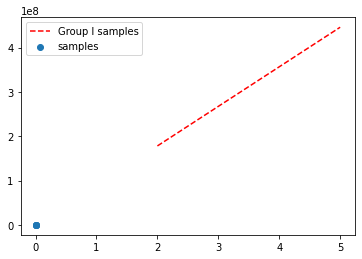

In [ ]:
plt.figure()

# plt.xticks(np.arange(2.8, 3.4, 0.1))
# plt.yticks(np.arange(1.4, 2, 0.1))
plt.plot(pre_x,pre_y_1,label='Group I samples', linestyle='--',color='r')

plt.scatter(X, Y,label='samples')

plt.legend()
plt.show()

In [ ]:
y

0    1.413423
1    1.593309
2    1.808289
3    1.896119
Name: y, dtype: float64

In [ ]:
x

0    0.003354
1    0.003095
2    0.002914
3    0.002832
Name: x, dtype: float64

In [ ]:
y = y.to_numpy().reshape(-1, 1)
y


array([[1.41342303],
       [1.59330853],
       [1.80828877],
       [1.89611948]])

In [ ]:
x = x.to_numpy().reshape(-1, 1)
x


array([[0.00335402],
       [0.00309454],
       [0.00291418],
       [0.00283166]])

In [ ]:
lasso1 = Lasso(alpha=25)
lasso1.fit(x, y)
# lasso2 = Lasso(alpha=1)
# lasso2.fit(X, y)
# lasso3 = Lasso(alpha=10)
# lasso3.fit(X, y)

NameError: ignored

In [ ]:
pre_x = [[2], [100]]
pre_y_1 = lasso1.predict(pre_x)

print(pre_x)
print(pre_y_1)
 


[[2], [100]]
[1.67778495 1.67778495]
